In [55]:
# Import all required libraries
# Read csv the dataframe
# Inspect the dataframe and clean if required
# Make new dataframe with selected feature columns
# Scale the features
# Test train split (Randon seed, shuffle, stratify)
# Create KNN model and fit the training data
# Predict the test data
# Evaluate the model using recall and precision. Present a confusion matrix.
# Perform cross validation with 5 folds and report average recall and precision
# Perform hyperparameter tuning using GridSearchCV for n_neighbors from 1 to 20
# Create a pipeline including scaling and KNN model
# Add visualisations


In [56]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, precision_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

In [57]:
ttc_initial=pd.read_csv("/Users/shahabmalik/Documents/TTC_Team_Project/ml13-ttc-delays-project/src_files/ttc_delays_final_df.csv")

In [58]:
ttc_initial.head()

,date,year,month,day_of_month,weekday_num,time,hour,minute,day,day_of_week,...,delay_category,min_delay,location_bound,line,major_delay_flag,rush_hour_flag,controllable_delay_flag,season,major_event_flag,major_event_desc
0,2014-01-01,2014,1,1,3,00:21,0,21,Wednesday,3,...,Passenger,55,W,BD,1,0,0,Winter,0,NaN
1,2014-01-01,2014,1,1,3,02:06,2,6,Wednesday,3,...,Passenger,3,W,BD,0,0,0,Winter,0,NaN
2,2014-01-01,2014,1,1,3,03:10,3,10,Wednesday,3,...,Passenger,3,W,BD,0,0,0,Winter,0,NaN
3,2014-01-01,2014,1,1,3,03:20,3,20,Wednesday,3,...,Passenger,5,S,YU,0,0,1,Winter,0,NaN
4,2014-01-01,2014,1,1,3,08:48,8,48,Wednesday,3,...,Staff,5,E,BD,0,1,1,Winter,0,NaN


In [59]:
# Select features and target variable and create new dataframe
# month	day_of_month	hour	day_of_week	delay_category	line	major_delay_flag

ttc=ttc_initial[['month','day_of_month','weekday_num','hour','day_of_week','line', 'delay_category', 'rush_hour_flag','season','controllable_delay_flag']]

In [60]:
ttc.head()

,month,day_of_month,weekday_num,hour,day_of_week,line,delay_category,rush_hour_flag,season,controllable_delay_flag
0,1,1,3,0,3,BD,Passenger,0,Winter,0
1,1,1,3,2,3,BD,Passenger,0,Winter,0
2,1,1,3,3,3,BD,Passenger,0,Winter,0
3,1,1,3,3,3,YU,Passenger,0,Winter,1
4,1,1,3,8,3,BD,Staff,1,Winter,1


In [61]:
# One-hot encode categorical variables
from sklearn.preprocessing import OneHotEncoder
categorical_features = ['delay_category', 'line', 'season']
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_features = encoder.fit_transform(ttc[categorical_features])
encoded_feature_names = encoder.get_feature_names_out(categorical_features)
encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names)
ttc_encoded = pd.concat([ttc.drop(columns=['delay_category', 'line', 'season']), encoded_df], axis=1)
ttc_encoded

,month,day_of_month,weekday_num,hour,day_of_week,rush_hour_flag,controllable_delay_flag,delay_category_Passenger,delay_category_Staff,delay_category_Technical,delay_category_Weather,line_SHP,line_YU,season_Spring,season_Summer,season_Winter
0,1,1,3,0,3,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,1,3,2,3,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,1,3,3,3,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,1,3,3,3,0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1,1,3,8,3,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75499,9,30,2,20,2,0,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
75500,9,30,2,20,2,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75501,9,30,2,20,2,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75502,9,30,2,21,2,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
# Feature Scaling

# Create a copy of the original 'ttc' dataframe to ensure we're not modifying the original data
standardized_ttc = ttc_encoded.copy()

# Specify the columns that we do NOT want to scale
columns_to_exclude = ['rush_hour_flag','delay_category_Passenger','delay_category_Staff','delay_category_Technical','delay_category_Weather','delay_category_Weather','line_SHP','line_YU','season_Spring','season_Summer','season_Winter','major_delay_flag', 'controllable_delay_flag']

# Select the columns that we want to scale by excluding the 'id' and 'diagnosis' columns
# This will return a list of the numeric columns we need to scale
columns_to_scale = standardized_ttc.columns.difference(columns_to_exclude)

# Initialize the StandardScaler to standardize the selected numeric columns
scaler = StandardScaler()

# Apply the scaler to the selected columns. This transforms the data so that each feature
# has a mean of 0 and a standard deviation of 1, which is essential to prevent larger
# scale features from dominating the analysis, especially for distance-based algorithms like KNN.
standardized_ttc[columns_to_scale] = scaler.fit_transform(ttc[columns_to_scale])

# Output the standardized dataframe with the scaled numeric columns
standardized_ttc


,month,day_of_month,weekday_num,hour,day_of_week,rush_hour_flag,controllable_delay_flag,delay_category_Passenger,delay_category_Staff,delay_category_Technical,delay_category_Weather,line_SHP,line_YU,season_Spring,season_Summer,season_Winter
0,-1.519599,-1.683939,-0.031463,-2.142370,-0.031463,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-1.519599,-1.683939,-0.031463,-1.813028,-0.031463,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-1.519599,-1.683939,-0.031463,-1.648357,-0.031463,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-1.519599,-1.683939,-0.031463,-1.648357,-0.031463,0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,-1.519599,-1.683939,-0.031463,-0.825001,-0.031463,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75499,0.781520,1.607590,-0.562198,1.151054,-0.562198,0,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
75500,0.781520,1.607590,-0.562198,1.151054,-0.562198,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75501,0.781520,1.607590,-0.562198,1.151054,-0.562198,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75502,0.781520,1.607590,-0.562198,1.315725,-0.562198,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
standardized_ttc["controllable_delay_flag"].value_counts(normalize=True)

controllable_delay_flag
0    0.628655
1    0.371345
Name: proportion, dtype: float64

In [64]:
#set the seed
np.random.seed(1)
#splite the data
standardized_ttc_train, standardized_ttc_test = train_test_split(standardized_ttc, test_size=0.25, random_state=42, shuffle=True, stratify=standardized_ttc['controllable_delay_flag'])

In [65]:
standardized_ttc_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56628 entries, 49042 to 7007
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   month                     56628 non-null  float64
 1   day_of_month              56628 non-null  float64
 2   weekday_num               56628 non-null  float64
 3   hour                      56628 non-null  float64
 4   day_of_week               56628 non-null  float64
 5   rush_hour_flag            56628 non-null  int64  
 6   controllable_delay_flag   56628 non-null  int64  
 7   delay_category_Passenger  56628 non-null  float64
 8   delay_category_Staff      56628 non-null  float64
 9   delay_category_Technical  56628 non-null  float64
 10  delay_category_Weather    56628 non-null  float64
 11  line_SHP                  56628 non-null  float64
 12  line_YU                   56628 non-null  float64
 13  season_Spring             56628 non-null  float64
 14  season_S

In [66]:
standardized_ttc_train["controllable_delay_flag"].value_counts(normalize=True)

controllable_delay_flag
0    0.628647
1    0.371353
Name: proportion, dtype: float64

In [67]:
knn = KNeighborsClassifier()

In [68]:
parameter_grid = {
    "n_neighbors": range(1, 200, 20),
}

In [69]:
standardized_ttc_tune_grid = GridSearchCV(
    estimator=knn,
    param_grid=parameter_grid,
    cv=10
)

In [70]:
standardized_ttc_tune_grid.fit(
    standardized_ttc_train.drop(columns=["controllable_delay_flag"]),
    standardized_ttc_train["controllable_delay_flag"]
)

accuracies_grid = pd.DataFrame(standardized_ttc_tune_grid.cv_results_)
accuracies_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.025662,0.002429,0.139221,0.022417,1,{'n_neighbors': 1},0.740773,0.734416,0.746424,0.750662,0.738125,0.753311,0.742539,0.723998,0.737372,0.742847,0.741047,0.007962,10
1,0.027414,0.004188,0.363800,0.069025,21,{'n_neighbors': 21},0.795338,0.782977,0.788451,0.795515,0.782801,0.789334,0.789511,0.781211,0.785058,0.784175,0.787437,0.004828,9
2,0.028301,0.010246,0.456849,0.078433,41,{'n_neighbors': 41},0.800812,0.784743,0.791806,0.801519,0.788451,0.793572,0.793396,0.786332,0.793536,0.789650,0.792382,0.005259,6
3,0.022217,0.000597,0.459807,0.004353,61,{'n_neighbors': 61},0.804697,0.787392,0.795868,0.799400,0.786332,0.798340,0.794455,0.789334,0.790887,0.785235,0.793194,0.006086,1
4,0.022008,0.001229,0.517041,0.003517,81,{'n_neighbors': 81},0.804167,0.788275,0.793572,0.799223,0.784037,0.798517,0.795868,0.792866,0.792476,0.782762,0.793176,0.006402,2
5,0.022006,0.000594,0.576791,0.002944,101,{'n_neighbors': 101},0.801519,0.787745,0.795515,0.797810,0.782447,0.797987,0.793572,0.790924,0.794596,0.784882,0.792700,0.005814,4
6,0.021689,0.000908,0.631177,0.006248,121,{'n_neighbors': 121},0.802578,0.788098,0.793396,0.797810,0.782447,0.799576,0.794102,0.789511,0.795125,0.785588,0.792823,0.006051,3
7,0.022104,0.000474,0.689703,0.004494,141,{'n_neighbors': 141},0.803284,0.788805,0.794455,0.796398,0.784213,0.800459,0.791806,0.789864,0.790533,0.784882,0.792470,0.005919,5
8,0.021835,0.000652,0.734787,0.005435,161,{'n_neighbors': 161},0.801342,0.785096,0.793925,0.794985,0.784743,0.796221,0.789687,0.789864,0.791063,0.785058,0.791199,0.005202,7
9,0.021367,0.000538,0.780425,0.008134,181,{'n_neighbors': 181},0.801165,0.783330,0.792160,0.793043,0.783684,0.797281,0.788805,0.789334,0.786471,0.781526,0.789680,0.006009,8


In [71]:
standardized_ttc_tune_grid.best_params_

{'n_neighbors': 61}

In [72]:
knn = KNeighborsClassifier(n_neighbors=61)

In [73]:
standardized_ttc_train.head()

,month,day_of_month,weekday_num,hour,day_of_week,rush_hour_flag,controllable_delay_flag,delay_category_Passenger,delay_category_Staff,delay_category_Technical,delay_category_Weather,line_SHP,line_YU,season_Spring,season_Summer,season_Winter
49042,0.781520,-0.775931,1.030008,-2.142370,1.030008,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
70201,-1.231959,0.245578,-0.562198,-0.989672,-0.562198,1,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
44690,-1.231959,0.813083,-0.031463,0.657040,-0.031463,1,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
41172,1.069159,-0.094925,1.030008,-0.330987,1.030008,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
21420,0.781520,0.245578,-0.562198,-1.154343,-0.562198,0,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [74]:
feature_cols = standardized_ttc_train.drop(columns=['controllable_delay_flag'])

In [75]:
feature_cols.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56628 entries, 49042 to 7007
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   month                     56628 non-null  float64
 1   day_of_month              56628 non-null  float64
 2   weekday_num               56628 non-null  float64
 3   hour                      56628 non-null  float64
 4   day_of_week               56628 non-null  float64
 5   rush_hour_flag            56628 non-null  int64  
 6   delay_category_Passenger  56628 non-null  float64
 7   delay_category_Staff      56628 non-null  float64
 8   delay_category_Technical  56628 non-null  float64
 9   delay_category_Weather    56628 non-null  float64
 10  line_SHP                  56628 non-null  float64
 11  line_YU                   56628 non-null  float64
 12  season_Spring             56628 non-null  float64
 13  season_Summer             56628 non-null  float64
 14  season_W

In [76]:
knn.fit(X= feature_cols  , y= standardized_ttc_train["controllable_delay_flag"])

KNeighborsClassifier(n_neighbors=61)

In [77]:
feature_cols_2  = standardized_ttc_test.drop(columns=['controllable_delay_flag'])

In [78]:
knn.feature_names_in_

array(['month', 'day_of_month', 'weekday_num', 'hour', 'day_of_week',
       'rush_hour_flag', 'delay_category_Passenger',
       'delay_category_Staff', 'delay_category_Technical',
       'delay_category_Weather', 'line_SHP', 'line_YU', 'season_Spring',
       'season_Summer', 'season_Winter'], dtype=object)

In [79]:
X_test = standardized_ttc_test[knn.feature_names_in_]

In [80]:
standardized_ttc_test["predicted"] = knn.predict(X_test)
standardized_ttc_test

,month,day_of_month,weekday_num,hour,day_of_week,rush_hour_flag,controllable_delay_flag,delay_category_Passenger,delay_category_Staff,delay_category_Technical,delay_category_Weather,line_SHP,line_YU,season_Spring,season_Summer,season_Winter,predicted
40829,0.781520,1.607590,0.499273,1.480397,0.499273,0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
23828,-1.519599,1.721091,-0.031463,-0.825001,-0.031463,1,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1
31335,-1.231959,-0.889432,1.560744,1.315725,1.560744,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
54702,-0.369039,0.472580,1.560744,0.327698,1.560744,0,0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0
75500,0.781520,1.607590,-0.562198,1.151054,-0.562198,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18536,-0.656679,0.926584,-0.562198,0.657040,-0.562198,1,0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0
43582,-1.519599,-0.435428,-0.031463,0.986383,-0.031463,0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
30007,-1.519599,0.926584,0.499273,-0.660329,0.499273,1,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1
36049,1.644439,0.699582,-0.562198,0.492369,-0.562198,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0


In [81]:
standardized_ttc_test[["controllable_delay_flag", "predicted"]]

,controllable_delay_flag,predicted
40829,0,0
23828,1,1
31335,0,0
54702,0,0
75500,0,0
...,...,...
18536,0,0
43582,0,0
30007,0,1
36049,0,0


In [82]:
knn.score(
    X_test,
    y= standardized_ttc_test["controllable_delay_flag"]
)

0.7921699512608603

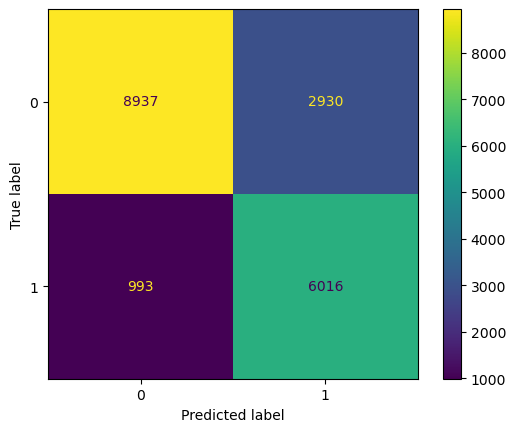

In [83]:
# Create a confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(
    knn,
    X_test,
    standardized_ttc_test["controllable_delay_flag"]
)

In [84]:
from sklearn.ensemble import RandomForestClassifier

# 1. Build X_train and y_train
feature_cols = knn.feature_names_in_   # or whatever you used before

X_train = standardized_ttc_train[feature_cols]
y_train = standardized_ttc_train["controllable_delay_flag"]

# 2. Fit Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# 3. Build feature importance table
rf_importance = pd.DataFrame({
    "feature": X_train.columns,
    "importance": rf.feature_importances_
}).sort_values("importance", ascending=False)

rf_importance.head(40)


,feature,importance
1,day_of_month,0.266147
8,delay_category_Technical,0.185827
3,hour,0.172466
6,delay_category_Passenger,0.111248
7,delay_category_Staff,0.099151
0,month,0.072879
4,day_of_week,0.024855
2,weekday_num,0.024774
11,line_YU,0.014158
5,rush_hour_flag,0.007595


In [85]:
X_test = standardized_ttc_test[feature_cols]
y_test = standardized_ttc_test["controllable_delay_flag"]

In [86]:
rf.score(X_test, y_test)

0.7678003814367451

In [87]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = rf.predict(X_test)
print("Confusion Matrix:", confusion_matrix(y_test, y_pred))
print("Classification Report:", classification_report(y_test, y_pred))

Confusion Matrix: [[9537 2330]
 [2053 4956]]
Classification Report:               precision    recall  f1-score   support

           0       0.82      0.80      0.81     11867
           1       0.68      0.71      0.69      7009

    accuracy                           0.77     18876
   macro avg       0.75      0.76      0.75     18876
weighted avg       0.77      0.77      0.77     18876



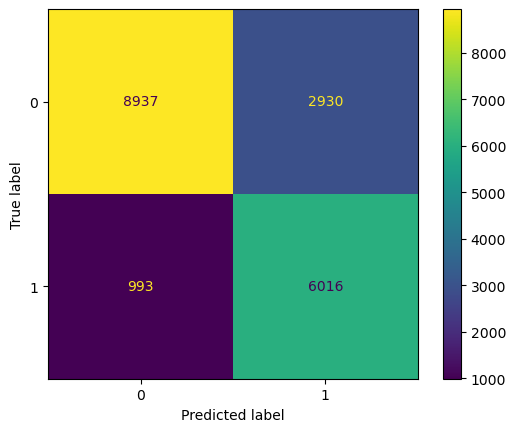

In [88]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(
    knn,
    X_test,
    standardized_ttc_test["controllable_delay_flag"]
)